In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [71]:
df = pd.read_csv('Advertising.csv')

In [72]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [73]:
# Удаление ненужного столбца 'Unnamed: 0'
df = df.drop(columns=['Unnamed: 0'])

In [74]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [76]:
# Проверка на наличие пропусков для каждой колонки
print("Проверка на наличие пропусков в каждом столбце:")
print(df.isnull().sum())

Проверка на наличие пропусков в каждом столбце:
TV           0
radio        0
newspaper    0
sales        0
dtype: int64


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [78]:
X = df[['TV', 'radio', 'newspaper']].values  # Признаки (предикторы)
y = df['sales'].values  # Целевая переменная

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [79]:
import numpy as np
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [80]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм:

<a href="https://ibb.co/Th3BQFn"><img src="https://i.ibb.co/DK2DBS6/zascas.jpg" alt="zascas" border="0"></a>

Примечание: 1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [81]:
# Реализация алгоритма координатного спуска
# Инициализация начальных весов w и количества итераций
w = np.zeros(X.shape[1])  # Нулевой вектор весов
n_iterations = 1000

# Алгоритм координатного спуска
for iteration in range(n_iterations):
    # Вычисление остатка r = y - X * w
    r = y - np.dot(X, w)
    for j in range(X.shape[1]):
        # r_j = r + X_j * w_j
        r_j = r + X[:, j] * w[j]
        # Обновление веса w_j
        w[j] = np.dot(X[:, j], r_j) / np.dot(X[:, j], X[:, j])
        # r = r - X_j * w_j
        r = r_j - X[:, j] * w[j]

In [82]:
# Вывод финальных весов
print("\nВесовые коэффициенты после координатного спуска:")
print(w)


Весовые коэффициенты после координатного спуска:
[ 41.56217205 110.13144155  73.52860638  -0.55006384]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [83]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

[ 41.56217205 110.13144155  73.52860638  -0.55006384]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [84]:
X = df[['TV', 'radio', 'newspaper']].values  # Признаки (предикторы)
y = df['sales'].values  # Целевая переменная

In [85]:
# Отмасштабируем столбцы матрицы X (вычтем среднее и разделим на стандартное отклонение)
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std

**Добавим единичный столбец**

In [86]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [87]:
def mse_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [88]:
y_mean_pred = np.full_like(y, np.mean(y))

In [89]:
mse_naive = mse_error(y, y_mean_pred)
print("Среднеквадратичная ошибка для наивного прогноза:", mse_naive)

Среднеквадратичная ошибка для наивного прогноза: 27.085743750000002


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [90]:
def lin_pred(X, w):
    return np.dot(X, w)

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [91]:
def stoch_grad_step(X, y, w, train_ind, eta):

    # Предсказание для выбранного индекса
    prediction = np.dot(X[train_ind], w)
    # Ошибка для выбранного примера
    error = prediction - y[train_ind]
    # Градиент для весов
    gradient = 2 * error * X[train_ind]
    # Обновление весов с учетом шага eta
    w_new = w - eta * gradient
    return w_new

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [92]:
def stochastic_gradient_descent(X, y, w_init, eta, max_iter, tol):

    w = w_init
    errors = []
    n_samples = X.shape[0]
    distance = float('inf')
    iteration = 0

    while distance > tol and iteration < max_iter:
        # Случайный индекс для выбора обучающего примера
        train_ind = np.random.randint(0, n_samples)
        # Выполняем один шаг стохастического градиентного спуска
        w_new = stoch_grad_step(X, y, w, train_ind, eta)
        # Рассчитываем ошибку
        y_pred = lin_pred(X, w_new)
        error = mse_error(y, y_pred)
        errors.append(error)
        # Рассчитываем евклидово расстояние между новым и старым вектором весов
        distance = np.linalg.norm(w_new - w)
        # Обновляем веса и увеличиваем итерацию
        w = w_new
        iteration += 1

    return w, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

In [93]:
w_init = np.zeros(X.shape[1])
eta = 0.001
max_iter = 10 ** 5
tol = 0.000001

w_final, errors = stochastic_gradient_descent(X, y, w_init, eta, max_iter, tol)

**Постройте график зависимости ошибки от номера итерации**

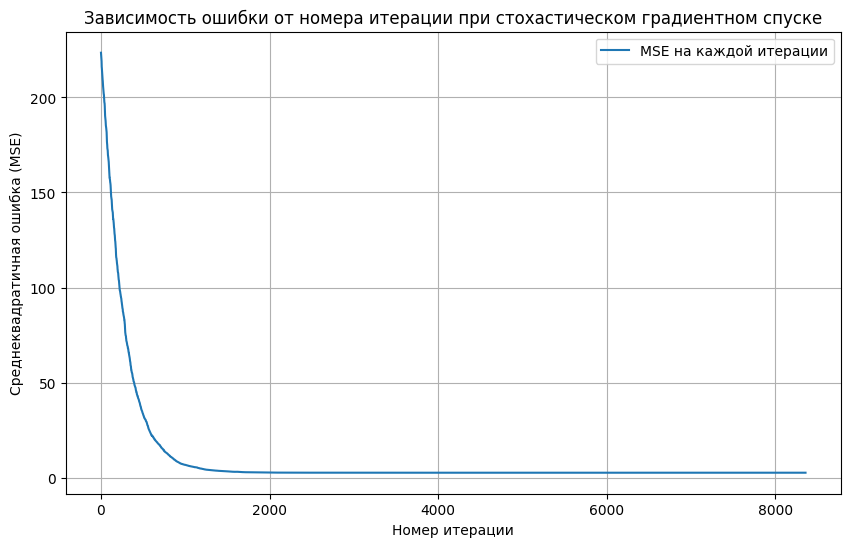

In [94]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(errors)), errors, label='MSE на каждой итерации')
plt.xlabel('Номер итерации')
plt.ylabel('Среднеквадратичная ошибка (MSE)')
plt.title('Зависимость ошибки от номера итерации при стохастическом градиентном спуске')
plt.legend()
plt.grid(True)
plt.show()

**Выведите вектор весов, к которому сошелся метод.**

In [95]:
print("Вектор весов, к которому сошелся метод:")
print(w_final)

Вектор весов, к которому сошелся метод:
[14.01280931  3.97629754  2.82868489 -0.03247902]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [96]:
print("Среднеквадратичная ошибка на последней итерации:")
print(errors[-1])

Среднеквадратичная ошибка на последней итерации:
2.788821161276192
